LIBRARY

In [22]:
import numpy as np
import pandas as pd
import requests
import sys
import bs4
import re
import urllib.request
import itertools
from collections import Counter
from matplotlib import pyplot as plt

In [23]:
from selenium import webdriver
from selenium.webdriver.common.alert import Alert

In [24]:
cpath = 'C:/Users/user/Dropbox/Taehoon/github_local/chromedriver'
# cpath = 'C:/Users\/lth3512/OneDrive - NEXON COMPANY/문서/GitHub/chromedriver'
driver = webdriver.Chrome(executable_path=cpath)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
driver.get('https://dhlottery.co.kr/gameResult.do?method=byWin')

In [26]:
windows_list = driver.window_handles
print(windows_list)

['CDwindow-F64E13032CC2421DA12F513BE8C9F893']


In [27]:
today_round = driver.find_element_by_class_name('win_result')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.


In [28]:
today_round_number = today_round.text.split('회')[0]

### get total lotto number

In [30]:
def get_lotto_num(page):
    search_url = "https://dhlottery.co.kr/gameResult.do?method=byWin&drwNo={page}"
    response = urllib.request.urlopen(search_url.format(page=page))
    lotto_data = response.read()
    soup = bs4.BeautifulSoup(lotto_data)
    ret = []
    newret = []
    for winnums in soup.findAll('div', attrs={'class': 'nums'}):
        winnum = winnums.findAll('span')
        ret.append(winnum)
    ret = ret[0]
    for i in ret:
        string = str(i)
        onlynum =  re.sub('<.+?>','', string, 0, re.I|re.S)
        newret.append(onlynum)
        newret = list(map(int, newret))
    return newret

In [32]:
return_list=[]
for i in range(1,int(today_round_number)):
    if i%100 ==0:
        print(i)
    return_list.append(get_lotto_num(i))

100
200
300
400
500
600
700
800
900


In [5]:
all_num = list(itertools.chain(*return_list))
all_num= pd.DataFrame(all_num,columns=["num"])
dict_result = Counter(all_num.num)
df = pd.DataFrame.from_dict(dict_result, orient='index').reset_index().sort_values("index").reset_index(drop=True)
df.rename(columns = {'index' : 'num',0:"count_num"}, inplace = True)

In [6]:
# threshold  of likely or unlikely 
threshold = (998 * 7)/45
(998 * 7)/45

155.24444444444444

In [7]:
998 * 7

6986

In [8]:
df["Unlikely"] = list(map(int,df.count_num<=155.24444444444444))

plotting

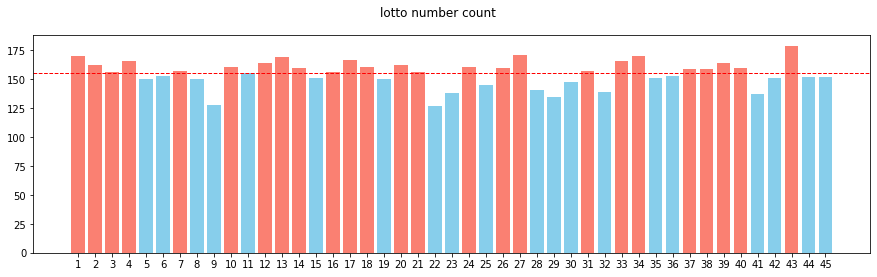

In [9]:
from matplotlib import pyplot as plt

t1 = df[df['count_num']>155.24444444444444]
t2 = df[df['count_num']<=155.24444444444444]

plt.rcParams["figure.figsize"] = (15,4)
y = df.count_num
x = df.num

plt.bar(t1.num, t1['count_num'], color='salmon')
plt.bar(t2.num, t2['count_num'], color='skyblue')
plt.axhline(y=threshold,linewidth=1, color='red' ,linestyle='--' )

# plt.bar(x, y, width=0.7)
plt.xticks (x)
plt.suptitle("lotto number count")
plt.show()